# (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from ISLP import load_data

Auto = load_data('Auto')
median_mpg = Auto['mpg'].median()
Auto['mpg01'] = np.where(Auto['mpg'] > median_mpg, 1, 0)

# (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

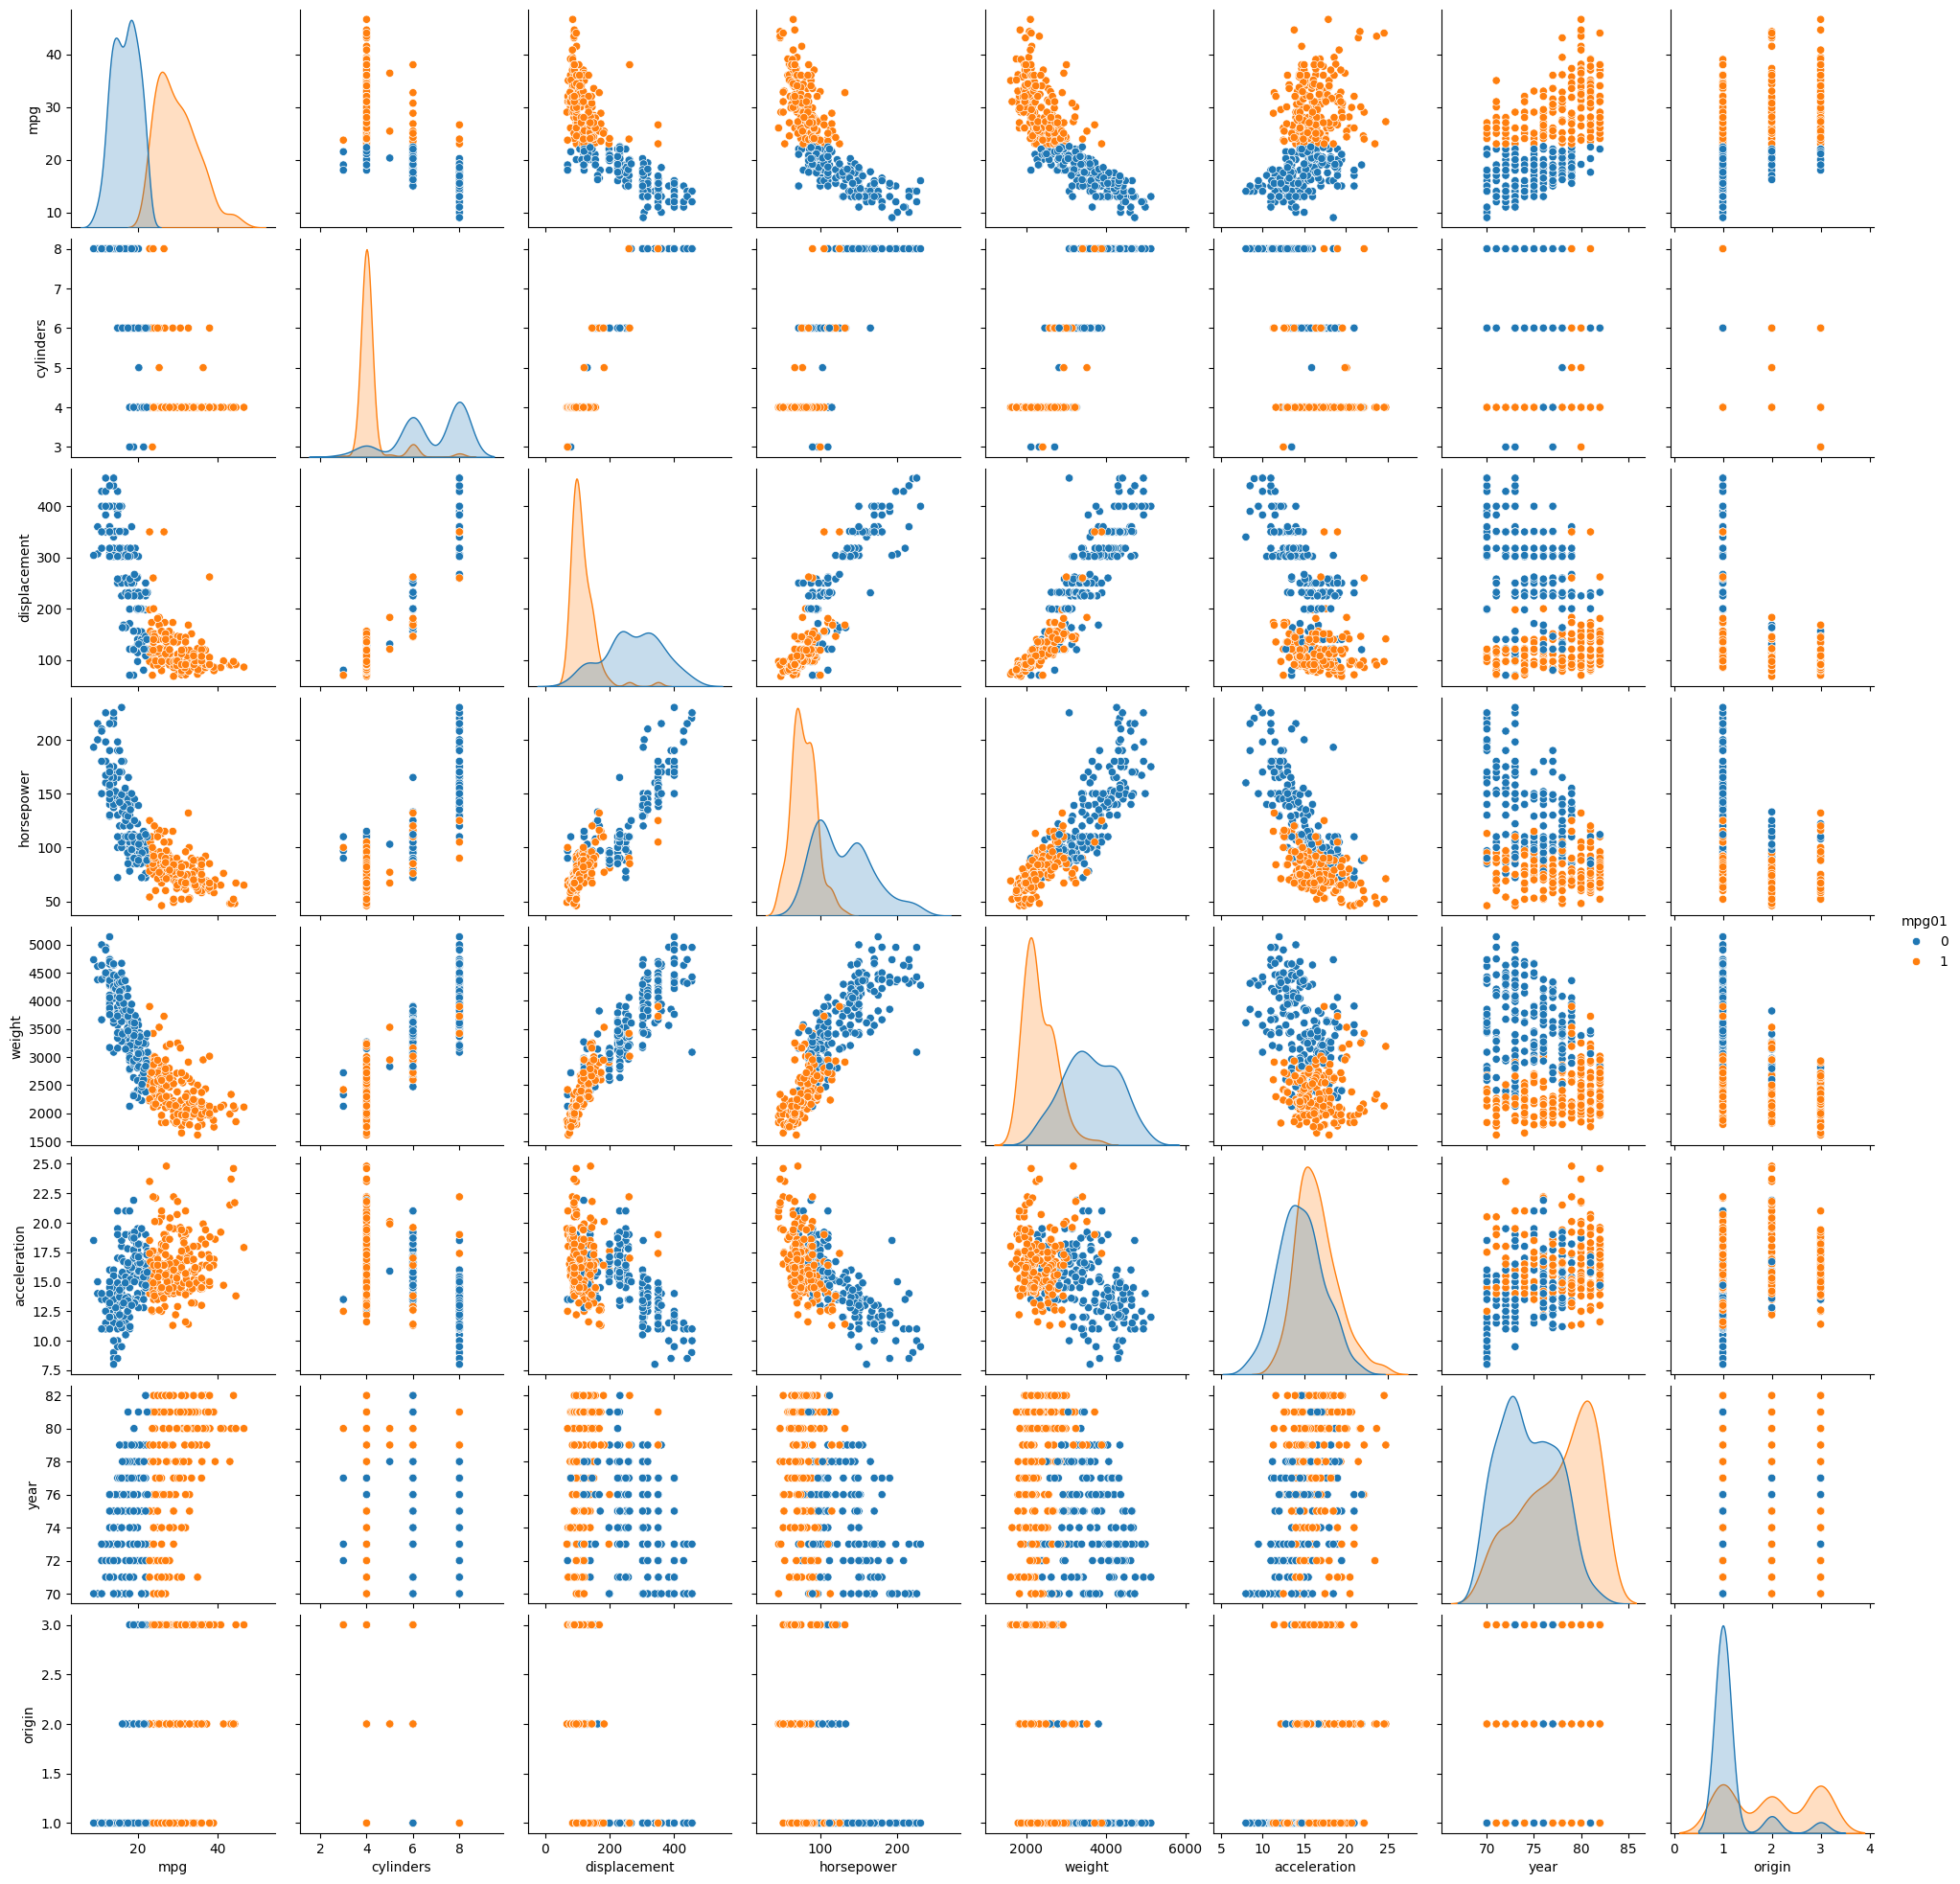

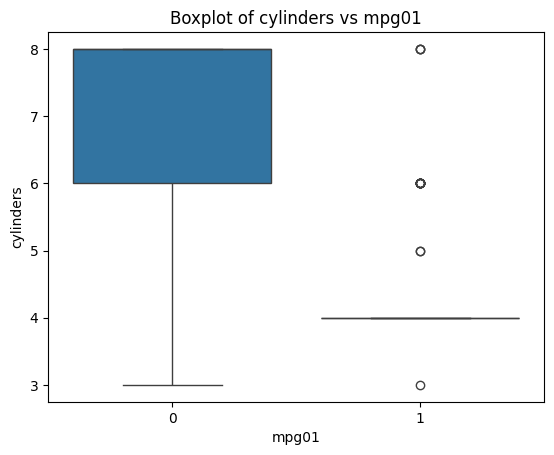

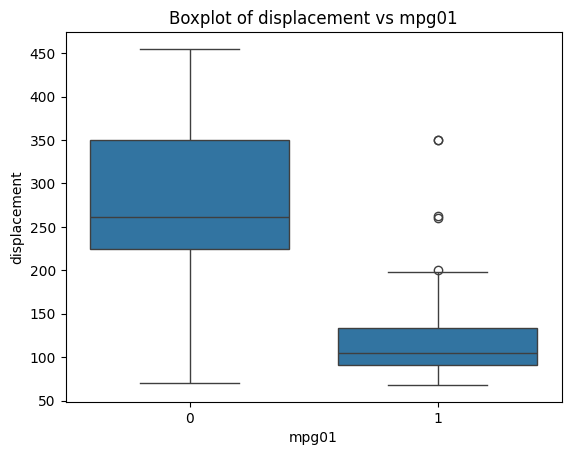

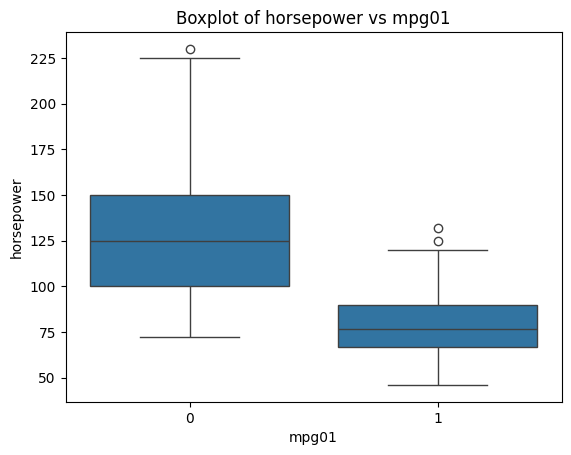

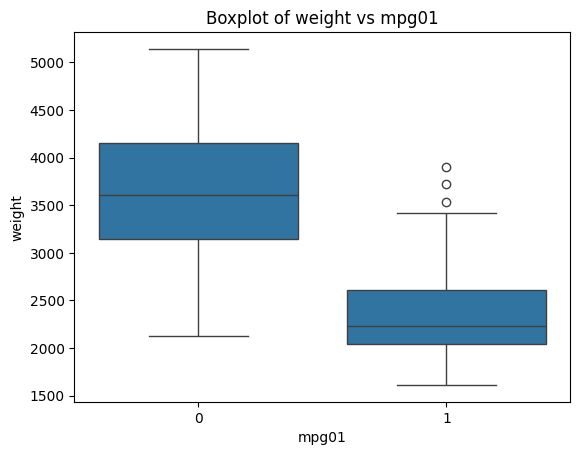

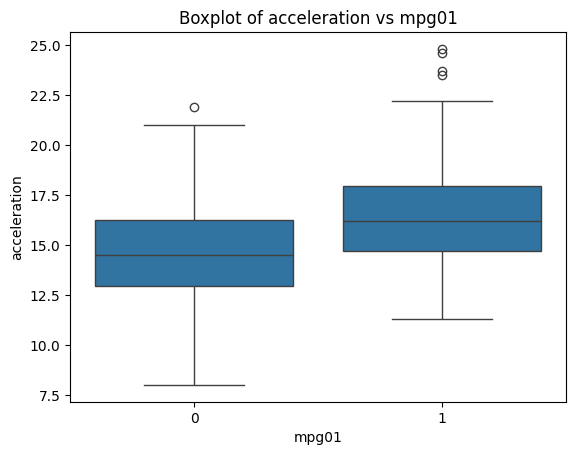

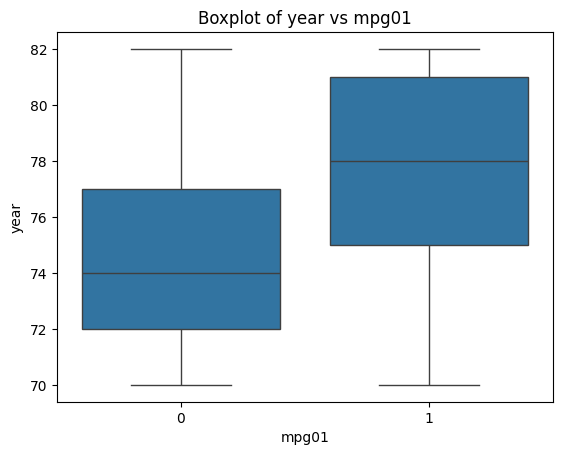

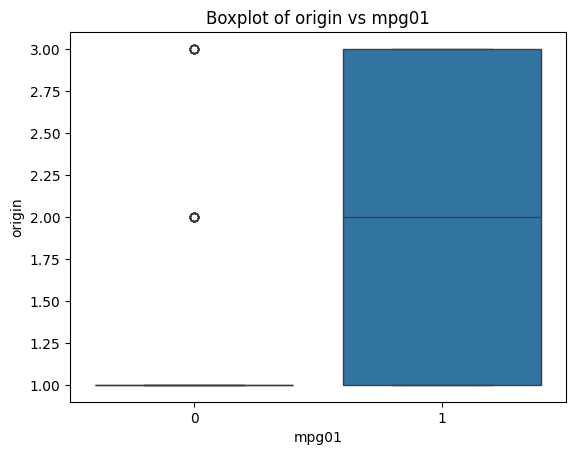

In [3]:
#用pairplot可視化
sns.pairplot(Auto, hue='mpg01')
plt.show()

#對每個變數和mpg01作圖
for column in Auto.columns:
    if column != 'mpg01' and column != 'mpg':
        plt.figure()
        sns.boxplot(x='mpg01', y=column, data=Auto)
        plt.title(f'Boxplot of {column} vs mpg01')
        plt.show()


It look like to use variables "weight","displacement","horsepower" is better since each distri. is not overlapped.

# (c) Split the data into a training set and a test set

In [5]:
X = Auto[['weight','displacement','horsepower']]
y = Auto['mpg01']

#分裂數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [6]:
lda = LDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

lda_error = 1 - accuracy_score(y_test, y_pred_lda)
print("LDA Test Error:", lda_error)


LDA Test Error: 0.1610169491525424


# (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [7]:
qda = QDA()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

qda_error = 1 - accuracy_score(y_test, y_pred_qda)
print("QDA Test Error:", qda_error)


QDA Test Error: 0.1694915254237288


# (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

log_reg_error = 1 - accuracy_score(y_test, y_pred_log)
print("Logistic Regression Test Error:", log_reg_error)


Logistic Regression Test Error: 0.1610169491525424


# (g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [9]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

nb_error = 1 - accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Test Error:", nb_error)


Naive Bayes Test Error: 0.1610169491525424


# (h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [10]:
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    
    knn_error = 1 - accuracy_score(y_test, y_pred_knn)
    print(f"KNN Test Error with K={k}:", knn_error)


KNN Test Error with K=1: 0.15254237288135597
KNN Test Error with K=2: 0.15254237288135597
KNN Test Error with K=3: 0.13559322033898302
KNN Test Error with K=4: 0.14406779661016944
KNN Test Error with K=5: 0.1610169491525424
KNN Test Error with K=6: 0.15254237288135597
KNN Test Error with K=7: 0.1694915254237288
KNN Test Error with K=8: 0.1694915254237288
KNN Test Error with K=9: 0.1694915254237288
KNN Test Error with K=10: 0.1694915254237288
KNN Test Error with K=11: 0.17796610169491522
KNN Test Error with K=12: 0.17796610169491522
KNN Test Error with K=13: 0.17796610169491522
KNN Test Error with K=14: 0.17796610169491522
KNN Test Error with K=15: 0.17796610169491522
KNN Test Error with K=16: 0.1694915254237288
KNN Test Error with K=17: 0.17796610169491522
KNN Test Error with K=18: 0.1694915254237288
KNN Test Error with K=19: 0.17796610169491522
KNN Test Error with K=20: 0.17796610169491522
